In [1]:
!wget https://eeweb.engineering.nyu.edu/~yao/EL5123/image/barbara_gray.bmp -O barbara.png

--2023-03-29 14:19:46--  https://eeweb.engineering.nyu.edu/~yao/EL5123/image/barbara_gray.bmp
Resolving eeweb.engineering.nyu.edu (eeweb.engineering.nyu.edu)... 128.238.64.104
Connecting to eeweb.engineering.nyu.edu (eeweb.engineering.nyu.edu)|128.238.64.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 263224 (257K) [image/bmp]
Saving to: ‘barbara.png’

barbara.png         100%[===================>] 257.05K   601KB/s    in 0.4s    

2023-03-29 14:19:47 (601 KB/s) - ‘barbara.png’ saved [263224/263224]



In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def load_image(image_path):
  # Load an image from a file path in grayscale
  img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE) 
  return img

def downsample_image(img, factor):
  # Downsample an image by a factor using numpy indexing
  return img[::factor, ::factor]

def quantize_image(img, bits):
  # Quantize an image to the specified number of bits using bit shifting and masking
  return (img // (2**(8 - bits))) * (2**(8 - bits))

def gamma_correction(img, gamma):
  # Apply gamma correction to an image using numpy array operations
  img_float = img / 255.0  # convert image to float in range [0, 1]
  corrected_img = np.power(img_float, gamma)  # apply gamma correction
  return (corrected_img * 255).astype(np.uint8)  # convert back to uint8 range [0, 255]

def calculate_histogram(img):
  # Calculate the histogram of an image using numpy histogram function
  hist, _ = np.histogram(img, bins=256, range=(0, 256))
  return hist

def contrast_stretch(img):
  # Stretch the contrast of an image using numpy array operations
  min_val, max_val = np.min(img), np.max(img)  # find the minimum and maximum values in the image
  stretched_img = (img - min_val) * (255 / (max_val - min_val))  # stretch the contrast
  return stretched_img.astype(np.uint8)  # convert back to uint8 range [0, 255]

def plot_image_and_histogram(img, hist, title):
  # Plot an image and its histogram side-by-side using matplotlib
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))
  fig.suptitle(title)
  ax1.imshow(img, cmap='gray')
  ax2.plot(hist)
  plt.show()

In [4]:
# Load images
# generate 2D sine wave
sine_wave = np.tile(np.uint8(128 + 127 * np.sin(np.linspace(-np.pi, np.pi, 256) * 8)), (256, 1))  
barbara_green = load_image("barbara.png")  # load green channel of Barbara image

# Task 1: Image Sampling
sine_wave_downsampled = downsample_image(sine_wave, 2)  # downsample 2D sine wave by a factor of 2
barbara_green_downsampled = downsample_image(barbara_green, 2)  # downsample Barbara image by a factor of 2

# Task 2: Image Quantization
quantization_bits = [4, 2, 1]
# quantize 2D sine wave to 4, 2, and 1 bits
sine_wave_quantized = [quantize_image(sine_wave, bits) for bits in quantization_bits]  
barbara_green_quantized = [quantize_image(barbara_green, bits) for bits in quantization_bits]  # quantize Barbara image to 4, 2, and 1 bits

# Task 3: Gamma Correction
# apply gamma correction with a gamma value of 2.2 to Barbara image
barbara_green_gamma_corrected = gamma_correction(barbara_green, 2.2)  

# Task 4: Histogram Calculation
barbara_green_hist = calculate_histogram(barbara_green)  # calculate histogram of green channel of Barbara image

# Task 5: Contrast Stretching
barbara_green_stretched = contrast_stretch(barbara_green)  # stretch the contrast of the green channel of Barbara image
barbara_green_stretched_hist = calculate_histogram(barbara_green_stretched)  # calculate the histogram of the contrast-stretched image

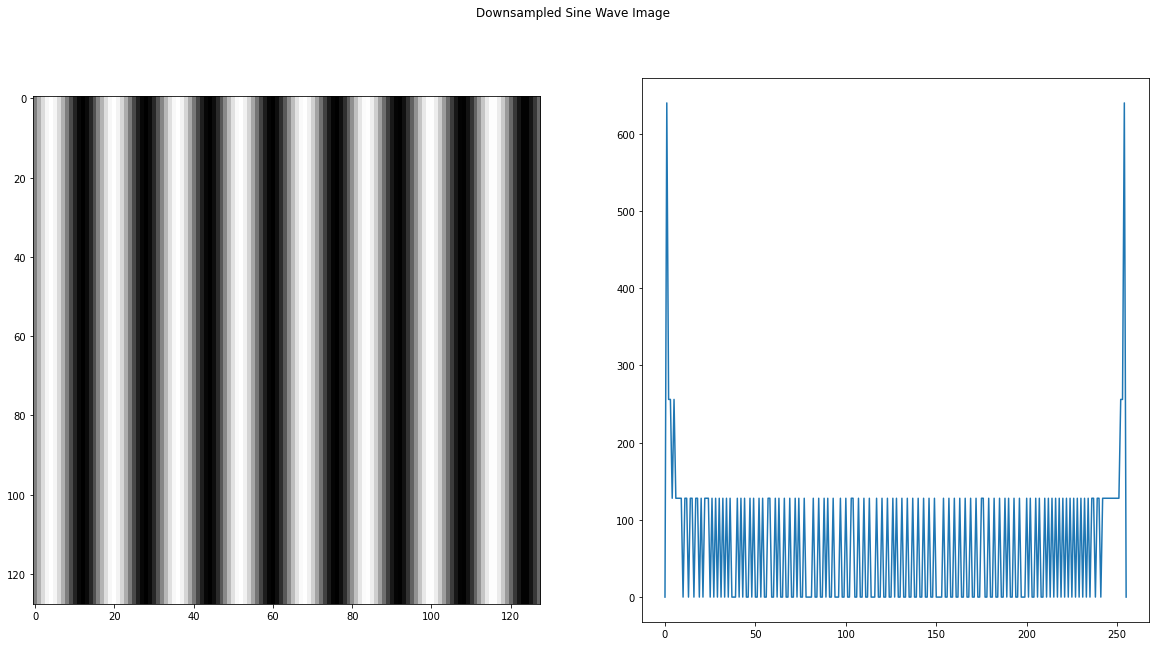

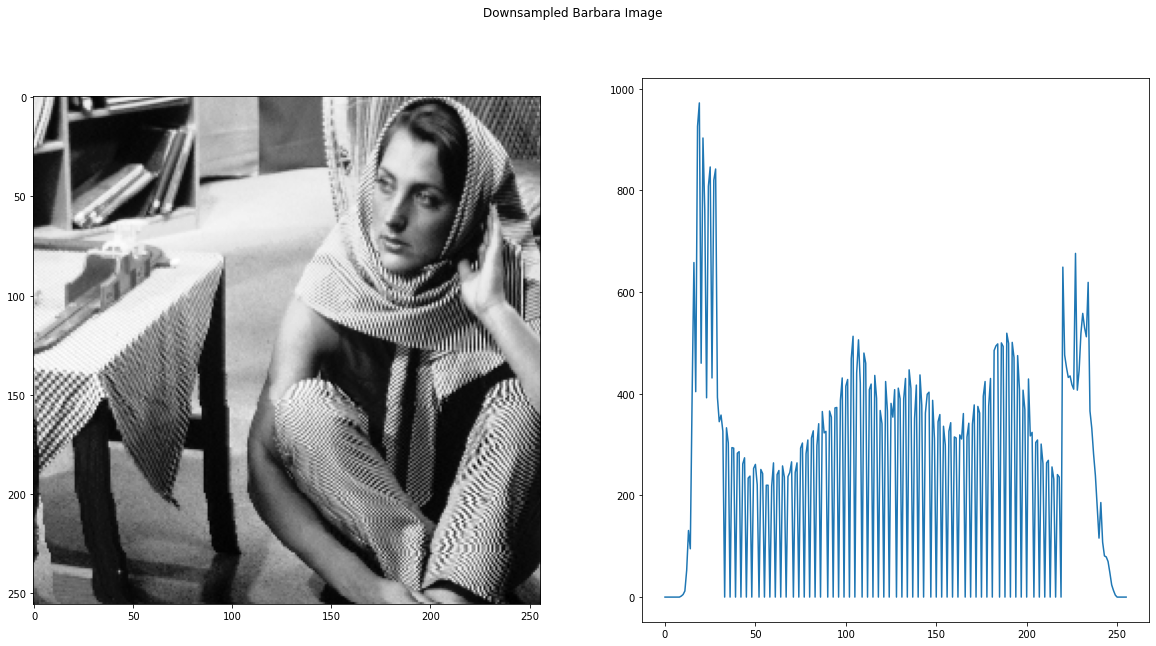

In [5]:
# Plot images and histograms for each task

# Task 1: Image Sampling
plot_image_and_histogram(sine_wave, calculate_histogram(sine_wave), "Original Sine Wave Image")
plot_image_and_histogram(sine_wave_downsampled, calculate_histogram(sine_wave_downsampled), "Downsampled Sine Wave Image")

plot_image_and_histogram(barbara_green, calculate_histogram(barbara_green), "Original Barbara Image")
plot_image_and_histogram(barbara_green_downsampled, calculate_histogram(barbara_green_downsampled), "Downsampled Barbara Image")

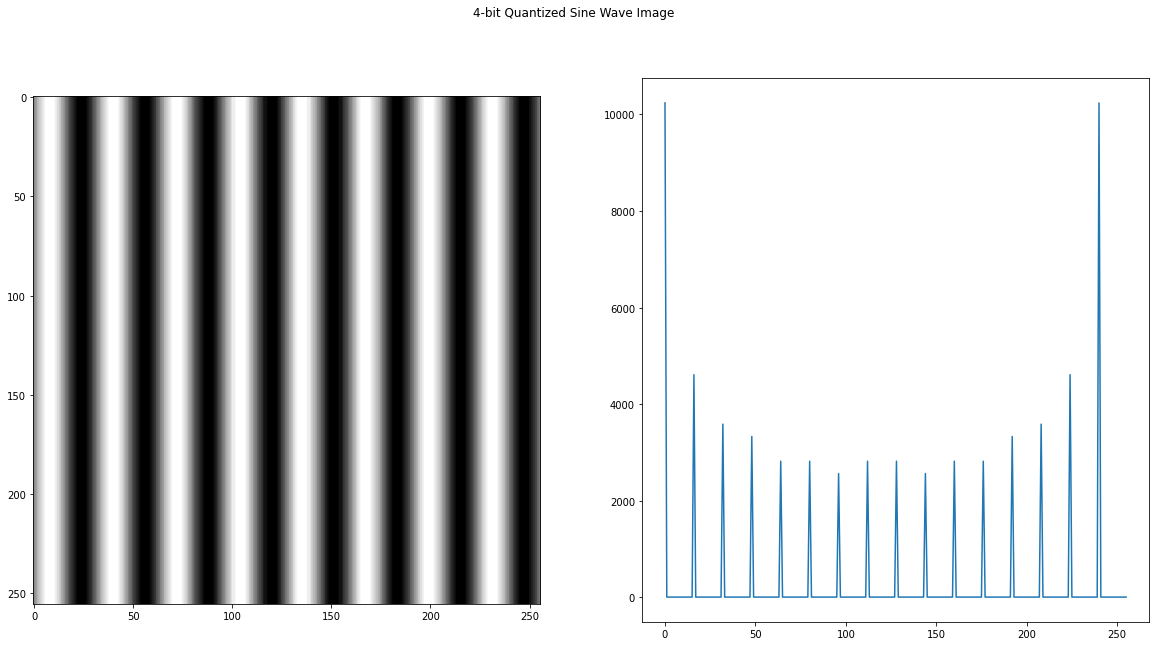

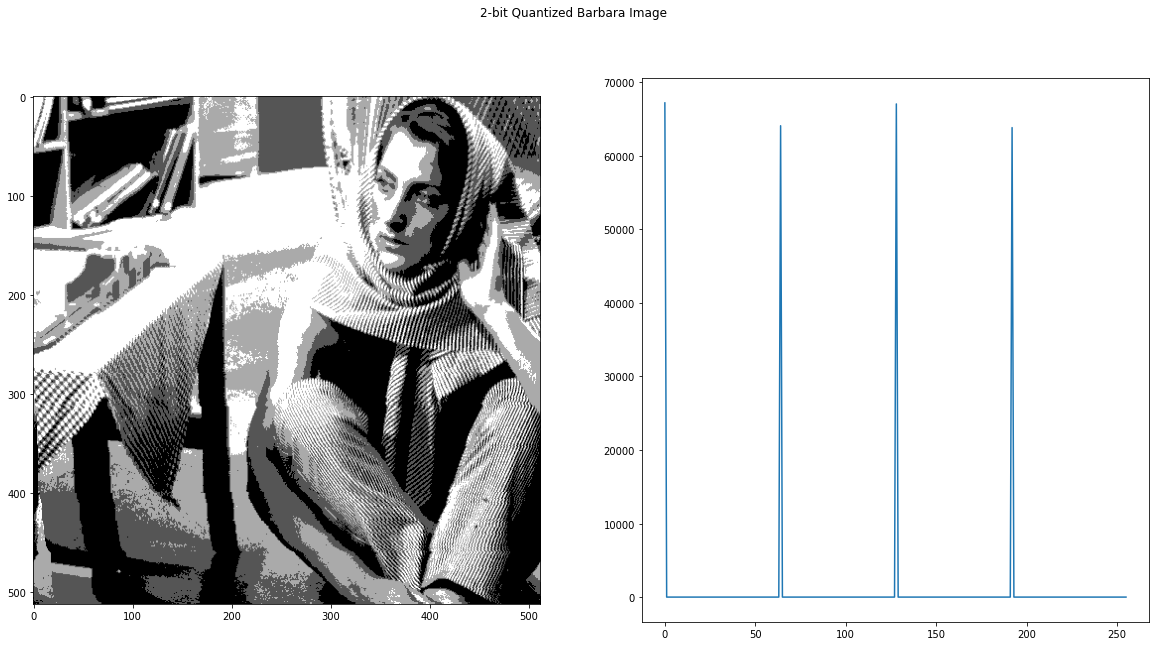

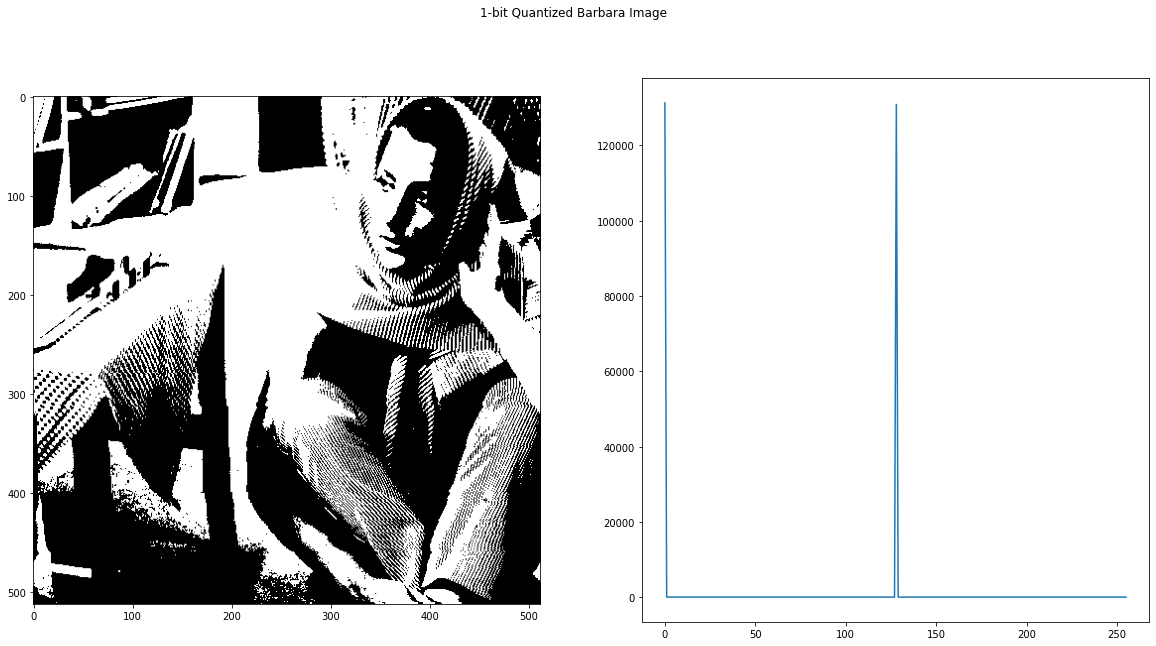

In [ ]:
# Task 2: Image Quantization
for i, bits in enumerate(quantization_bits):
    plot_image_and_histogram(sine_wave_quantized[i], calculate_histogram(sine_wave_quantized[i]), f"{bits}-bit Quantized Sine Wave Image")
    plot_image_and_histogram(barbara_green_quantized[i], calculate_histogram(barbara_green_quantized[i]), f"{bits}-bit Quantized Barbara Image")

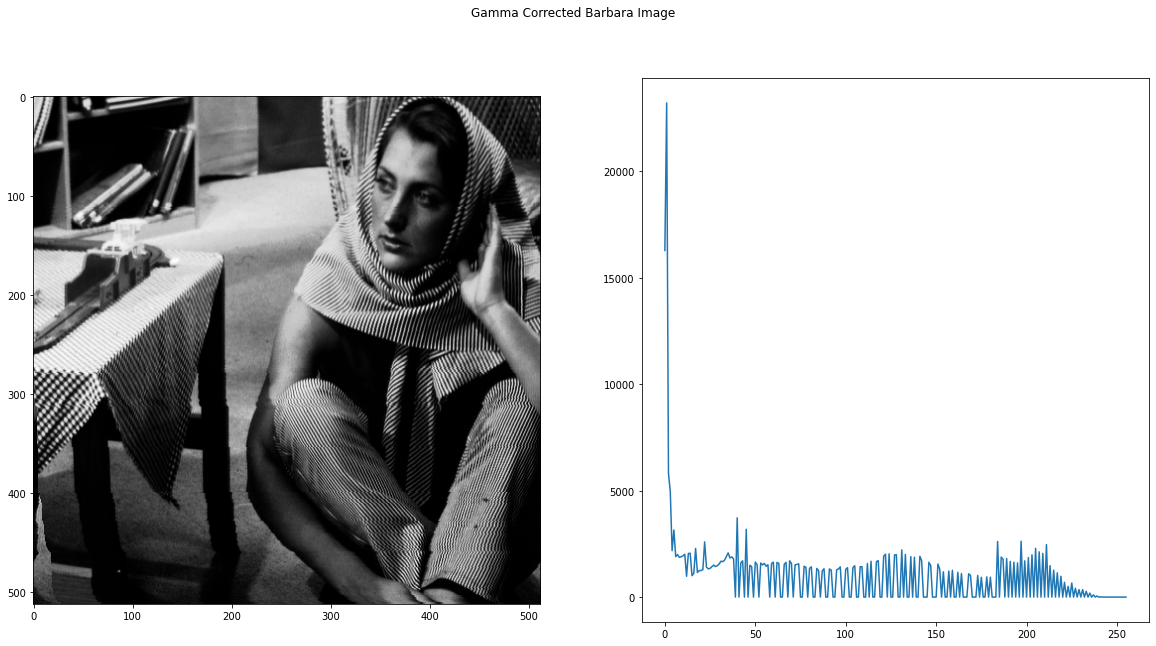

In [ ]:
# Task 3: Gamma Correction
plot_image_and_histogram(barbara_green_gamma_corrected, calculate_histogram(barbara_green_gamma_corrected), "Gamma Corrected Barbara Image")

In [ ]:
# Task 4: Histogram Calculation
plot_image_and_histogram(barbara_green, barbara_green_hist, "Original Barbara Image Histogram")

In [ ]:
# Task 5: Contrast Stretching
plot_image_and_histogram(barbara_green, calculate_histogram(barbara_green), "Original Barbara Image Histogram")
plot_image_and_histogram(barbara_green_stretched, barbara_green_stretched_hist, "Contrast Stretched Barbara Image Histogram")